In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

In [3]:
annotations = '/content/drive/MyDrive/PROJECT2/PROJECT2.0.2/annotations' #MENUJU KE FILE CSV TRAIN DAN VAL
trainDir = '/content/drive/MyDrive/PROJECT2/PROJECT2.0.2/Train' #MENUJU KE FILE GAMBAR TRAIN
valDir = '/content/drive/MyDrive/PROJECT2/PROJECT2.0.2/Test' #MENUJU KE FILE GAMBAR VAL
notetrain = '/content/drive/MyDrive/PROJECT2/PROJECT2.0.2/note/train' #MENUJU KE FOLDER YANG MENYIMPAN TXT UNTUK MENYIMPAN KATEGORI DAN BBOX DISETIAP GAMBARNYA UNTUK TRAIN
noteval = '/content/drive/MyDrive/PROJECT2/PROJECT2.0.2/note/test' #MENUJU KE FOLDER YANG MENYIMPAN TXT UNTUK MENYIMPAN KATEGORI DAN BBOX DISETIAP GAMBARNYA UNTUK VAL


In [4]:
'''
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204
'''

'\n!pip install fiftyone\n!pip install fiftyone-db-ubuntu2204\n'

In [5]:
'''
import fiftyone as fo
import fiftyone.zoo as foz
'''

'\nimport fiftyone as fo\nimport fiftyone.zoo as foz\n'

In [6]:
'''
dataset_train = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=3000)
dataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500)
'''

'\ndataset_train = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=3000)\ndataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500)\n'

In [7]:
'''
import os
from PIL import Image

# Loop melalui data train
for sample in dataset_train:
    # Ambil path gambar dari sample
    image_path = sample["filepath"]

    # Membuat path tujuan untuk gambar
    image_name = os.path.basename(image_path)
    image_dest = os.path.join(trainDir , image_name)

    # Simpan gambar
    with Image.open(image_path) as img:
        img.save(image_dest)

# Loop melalui data validasi
for sample in dataset_test:
    image_path = sample["filepath"]
    image_name = os.path.basename(image_path)
    image_dest = os.path.join(valDir  , image_name)
    with Image.open(image_path) as img:
        img.save(image_dest)
'''

'\nimport os\nfrom PIL import Image\n\n# Loop melalui data train\nfor sample in dataset_train:\n    # Ambil path gambar dari sample\n    image_path = sample["filepath"]\n\n    # Membuat path tujuan untuk gambar\n    image_name = os.path.basename(image_path)\n    image_dest = os.path.join(trainDir , image_name)\n\n    # Simpan gambar\n    with Image.open(image_path) as img:\n        img.save(image_dest)\n\n# Loop melalui data validasi\nfor sample in dataset_test:\n    image_path = sample["filepath"]\n    image_name = os.path.basename(image_path)\n    image_dest = os.path.join(valDir  , image_name)\n    with Image.open(image_path) as img:\n        img.save(image_dest)\n'

In [8]:
'''
# Fungsi untuk menghitung total file dalam suatu folder
def count_files(folder_path):
    file_count = sum(1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file)))
    return file_count

# Menghitung total file dalam trainDir
total_train_files = count_files(trainDir)

# Menghitung total file dalam valDir
total_val_files = count_files(valDir)

# Cetak total jumlah file untuk train dan validasi
print(f"Total files in trainDir: {total_train_files}")
print(f"Total files in valDir: {total_val_files}")
'''

'\n# Fungsi untuk menghitung total file dalam suatu folder\ndef count_files(folder_path):\n    file_count = sum(1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file)))\n    return file_count\n\n# Menghitung total file dalam trainDir\ntotal_train_files = count_files(trainDir)\n\n# Menghitung total file dalam valDir\ntotal_val_files = count_files(valDir)\n\n# Cetak total jumlah file untuk train dan validasi\nprint(f"Total files in trainDir: {total_train_files}")\nprint(f"Total files in valDir: {total_val_files}")\n'

In [9]:
'''
#read the keypoints file
with open(os.path.join(annotations, 'person_keypoints_train2017.json'), 'r') as file:
    trainData = json.load(file)
with open(os.path.join(annotations, 'person_keypoints_val2017.json'), 'r') as file:
    valData = json.load(file)
'''

"\n#read the keypoints file\nwith open(os.path.join(annotations, 'person_keypoints_train2017.json'), 'r') as file:\n    trainData = json.load(file)\nwith open(os.path.join(annotations, 'person_keypoints_val2017.json'), 'r') as file:\n    valData = json.load(file)\n"

In [10]:
'''
#convert every training and validation to pandas dataframe
trainImages = pd.DataFrame(trainData['images'])
trainAnnot = pd.DataFrame(trainData['annotations'])
valImages = pd.DataFrame(valData['images'])
valAnnot = pd.DataFrame(valData['annotations'])
'''

"\n#convert every training and validation to pandas dataframe\ntrainImages = pd.DataFrame(trainData['images'])\ntrainAnnot = pd.DataFrame(trainData['annotations'])\nvalImages = pd.DataFrame(valData['images'])\nvalAnnot = pd.DataFrame(valData['annotations'])\n"

In [11]:
'''trainImages'''

'trainImages'

In [12]:
'''trainAnnot'''

'trainAnnot'

In [13]:
'''valImages'''

'valImages'

In [14]:
'''valAnnot'''

'valAnnot'

In [15]:
'''
#this function was declared to convert the previous cluttered
#pandas dataframe to only take the necceessary columns
#and pre process the bounding box
def getData(imagesDf, annotDf):
    dataDict = []
    imageIdArr = annotDf['image_id'].values.tolist()
    for imgId in imageIdArr:
        tempDict = {}
        width = imagesDf.loc[imagesDf['id'] == imgId, 'width'].values
        height = imagesDf.loc[imagesDf['id'] == imgId, 'height'].values
        bboxes = annotDf.loc[annotDf['image_id'] == imgId, 'bbox'].values.tolist()
        categories = annotDf.loc[annotDf['image_id'] == imgId, 'category_id'].values.tolist()
        imageFileName = imagesDf.loc[imagesDf['id'] == imgId, 'file_name'].values[0]

        tempDict['imageFileName'] = imageFileName
        tempDict['width'] = width
        tempDict['height'] = height
        tempDict['bboxes'] = bboxes
        tempDict['categories'] = categories
        dataDict.append(tempDict)
    return
'''

"\n#this function was declared to convert the previous cluttered\n#pandas dataframe to only take the necceessary columns\n#and pre process the bounding box\ndef getData(imagesDf, annotDf):\n    dataDict = []\n    imageIdArr = annotDf['image_id'].values.tolist()\n    for imgId in imageIdArr:\n        tempDict = {}\n        width = imagesDf.loc[imagesDf['id'] == imgId, 'width'].values\n        height = imagesDf.loc[imagesDf['id'] == imgId, 'height'].values\n        bboxes = annotDf.loc[annotDf['image_id'] == imgId, 'bbox'].values.tolist()\n        categories = annotDf.loc[annotDf['image_id'] == imgId, 'category_id'].values.tolist()\n        imageFileName = imagesDf.loc[imagesDf['id'] == imgId, 'file_name'].values[0]\n\n        tempDict['imageFileName'] = imageFileName\n        tempDict['width'] = width\n        tempDict['height'] = height\n        tempDict['bboxes'] = bboxes\n        tempDict['categories'] = categories\n        dataDict.append(tempDict)\n    return\n"

In [16]:
'''
trainDataArr = getData(trainImages, trainAnnot)
valDataArr = getData(valImages, valAnnot)
'''

'\ntrainDataArr = getData(trainImages, trainAnnot)\nvalDataArr = getData(valImages, valAnnot)\n'

In [17]:
'''
readyTrain = pd.DataFrame(trainDataArr)
readyVal = pd.DataFrame(valDataArr)
'''

'\nreadyTrain = pd.DataFrame(trainDataArr)\nreadyVal = pd.DataFrame(valDataArr)\n'

In [18]:
'''readyTrain'''

'readyTrain'

In [19]:
'''readyTrain['imageFileName'].nunique()'''

"readyTrain['imageFileName'].nunique()"

In [20]:
'''readyVal'''

'readyVal'

In [21]:
'''readyVal['imageFileName'].nunique()'''

"readyVal['imageFileName'].nunique()"

In [22]:
'''
# Mengambil daftar nama file gambar di trainDir dan valDir
train_image_files = os.listdir(trainDir)
val_image_files = os.listdir(valDir)

# Mencocokkan nama file gambar dengan DataFrame dan menghapus baris yang tidak cocok
readyTrain = readyTrain[readyTrain['imageFileName'].isin(train_image_files)]
readyVal = readyVal[readyVal['imageFileName'].isin(val_image_files)]
'''

"\n# Mengambil daftar nama file gambar di trainDir dan valDir\ntrain_image_files = os.listdir(trainDir)\nval_image_files = os.listdir(valDir)\n\n# Mencocokkan nama file gambar dengan DataFrame dan menghapus baris yang tidak cocok\nreadyTrain = readyTrain[readyTrain['imageFileName'].isin(train_image_files)]\nreadyVal = readyVal[readyVal['imageFileName'].isin(val_image_files)]\n"

In [23]:
'''
readyTrain.to_csv(os.path.join(annotations,'train.csv'))
readyVal.to_csv(os.path.join(annotations,'val.csv'))
'''

"\nreadyTrain.to_csv(os.path.join(annotations,'train.csv'))\nreadyVal.to_csv(os.path.join(annotations,'val.csv'))\n"

In [24]:
readyTrain = pd.read_csv(os.path.join(annotations,'train.csv'))
readyVal= pd.read_csv(os.path.join(annotations,'val.csv'))

In [25]:
readyTrain

,Unnamed: 0,imageFileName,width,height,bboxes,categories
0,39,000000012754.jpg,[640],[640],"[[208.54, 17.26, 234.43, 415.64], [136.63, 81....","[1, 1]"
1,53,000000017741.jpg,[640],[523],"[[197.81, 436.81, 11.1, 12.23], [469.63, 432.4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,57,000000019523.jpg,[640],[480],"[[294.41, 191.01, 98.24, 275.43], [116.31, 166...","[1, 1, 1]"
3,79,000000019608.jpg,[427],[640],"[[213.69, 2.13, 116.35, 158.01]]",[1]
4,81,000000019157.jpg,[640],[456],"[[4.65, 114.11, 152.29, 315.3], [439.6, 29.72,...","[1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...,...
12438,262050,000000026953.jpg,[640],[427],"[[214.01, 192.35, 16.49, 34.38], [244.02, 193....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
12439,262057,000000026995.jpg,[640],[428],"[[535.41, 180.2, 48.47, 57.81], [0.96, 188.51,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
12440,262063,000000027050.jpg,[640],[413],"[[186.55, 67.75, 284.92, 250.58], [164.88, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
12441,262187,000000024608.jpg,[640],[481],"[[307.75, 124.04, 14.51, 31.35], [411.95, 115....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [26]:
readyTrain['imageFileName'].nunique()

3000

In [27]:
readyVal

,Unnamed: 0,imageFileName,width,height,bboxes,categories
0,3,000000069213.jpg,[640],[427],"[[276.35, 9.6, 244.69, 400.13], [67.18, 17.95,...","[1, 1, 1, 1, 1, 1, 1]"
1,16,000000055022.jpg,[480],[640],"[[426.97, 90.43, 40.87, 80.39], [423.17, 107.3...","[1, 1]"
2,19,000000009772.jpg,[550],[640],"[[275.58, 230.99, 57.63, 125.42]]",[1]
3,21,000000102331.jpg,[500],[357],"[[197.31, 46.83, 79.08, 106.72]]",[1]
4,24,000000078748.jpg,[640],[480],"[[56.77, 24.77, 48.52, 90.84], [95.57, 17.28, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...,...
2085,10980,000000078748.jpg,[640],[480],"[[56.77, 24.77, 48.52, 90.84], [95.57, 17.28, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2086,10981,000000095862.jpg,[500],[375],"[[94.33, 275.22, 210.55, 99.78], [408.35, 109....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2087,10984,000000087038.jpg,[640],[480],"[[226.04, 229.31, 11.59, 30.41], [257.85, 224....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2088,10989,000000012639.jpg,[480],[640],"[[21.57, 310.21, 161.08, 245.93], [23.58, 201....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [28]:
readyVal['imageFileName'].nunique()

500

In [29]:
'''
from PIL import Image
from PIL import ImageDraw
import pandas as pd
import os

# Loop melalui setiap baris di DataFrame
for index, row in readyTrain.iterrows():
    image_filename = row['imageFileName']
    bboxes = eval(row['bboxes'])  # Mengkonversi string JSON ke list Python
    categories = eval(row['categories'])  # Mengkonversi string JSON ke list Python

    # Muat gambar menggunakan PIL
    image_path = os.path.join(trainDir, image_filename)

    try:
        image = Image.open(image_path)
    except Exception as e:
        print(f"Error loading image {image_filename}: {e}")
        continue

    # Contoh: Menampilkan informasi gambar dan anotasi
    print(f"Image: {image_filename}, Bboxes: {bboxes}, Categories: {categories}")

    # Contoh: Menampilkan gambar dengan anotasi (visualisasi)
    image_with_annotations = image.copy()
    draw = ImageDraw.Draw(image_with_annotations)

    for bbox, category in zip(bboxes, categories):
        x, y, w, h = bbox
        draw.rectangle([x, y, x + w, y + h], outline='red', width=2)
        draw.text((x, y), f'Category: {category}', fill='red')

    image_with_annotations.show()
'''

'\nfrom PIL import Image\nfrom PIL import ImageDraw\nimport pandas as pd\nimport os\n\n# Loop melalui setiap baris di DataFrame\nfor index, row in readyTrain.iterrows():\n    image_filename = row[\'imageFileName\']\n    bboxes = eval(row[\'bboxes\'])  # Mengkonversi string JSON ke list Python\n    categories = eval(row[\'categories\'])  # Mengkonversi string JSON ke list Python\n\n    # Muat gambar menggunakan PIL\n    image_path = os.path.join(trainDir, image_filename)\n\n    try:\n        image = Image.open(image_path)\n    except Exception as e:\n        print(f"Error loading image {image_filename}: {e}")\n        continue\n\n    # Contoh: Menampilkan informasi gambar dan anotasi\n    print(f"Image: {image_filename}, Bboxes: {bboxes}, Categories: {categories}")\n\n    # Contoh: Menampilkan gambar dengan anotasi (visualisasi)\n    image_with_annotations = image.copy()\n    draw = ImageDraw.Draw(image_with_annotations)\n\n    for bbox, category in zip(bboxes, categories):\n        x, 

Image: 000000012754.jpg, Bboxes: [[208.54, 17.26, 234.43, 415.64], [136.63, 81.98, 122.25, 342.29]], Categories: [1, 1]


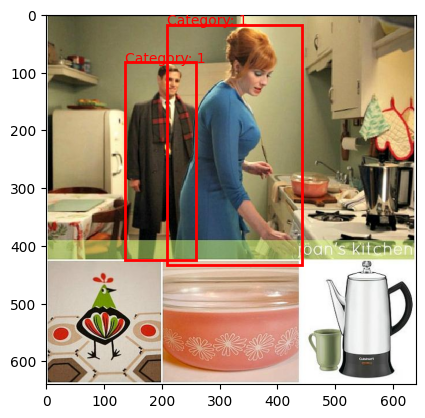

Image: 000000017741.jpg, Bboxes: [[197.81, 436.81, 11.1, 12.23], [469.63, 432.48, 15.39, 27.41], [310.7, 373.32, 6.59, 21.03], [226.83, 359.61, 5.73, 16.52], [73.57, 426.08, 12.78, 34.92], [324.16, 443.94, 17, 26.52], [582.58, 425.61, 11.63, 20.17], [320.84, 375.39, 5.19, 20.07], [313.09, 437.92, 18.86, 24.51], [287.17, 442.05, 25.31, 30.79], [101.99, 434.72, 9.01, 26.01], [24.89, 434.99, 13.9, 10.01], [317.81, 371.51, 4.25, 23.04], [147, 358, 105, 82]], Categories: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


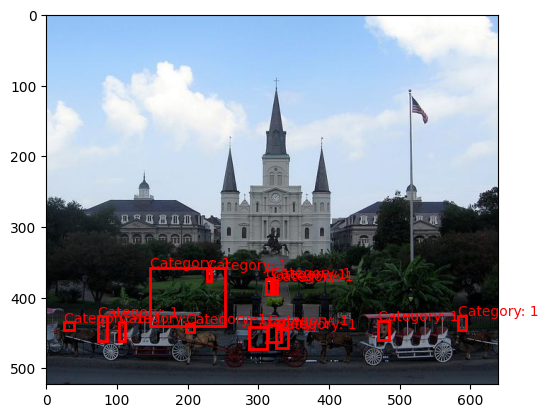

Image: 000000019523.jpg, Bboxes: [[294.41, 191.01, 98.24, 275.43], [116.31, 166.44, 99.2, 294.88], [379.2, 139.58, 74.93, 72.16]], Categories: [1, 1, 1]


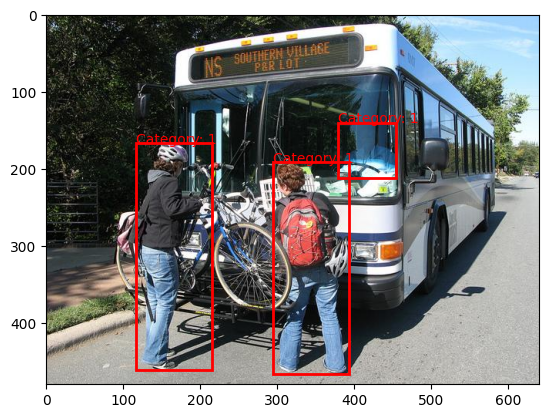

Image: 000000019608.jpg, Bboxes: [[213.69, 2.13, 116.35, 158.01]], Categories: [1]


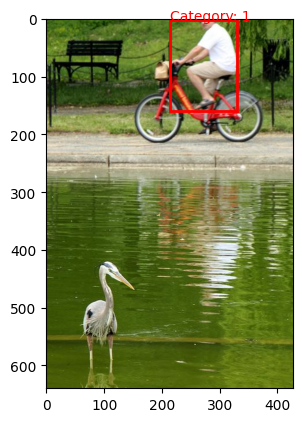

Image: 000000019157.jpg, Bboxes: [[4.65, 114.11, 152.29, 315.3], [439.6, 29.72, 169.08, 404.76], [546.72, 53.24, 90.58, 277.92], [534.4, 108.93, 26.35, 54.44], [434.05, 51.05, 61.52, 119.67], [427.99, 128.86, 13.45, 13.86]], Categories: [1, 1, 1, 1, 1, 1]


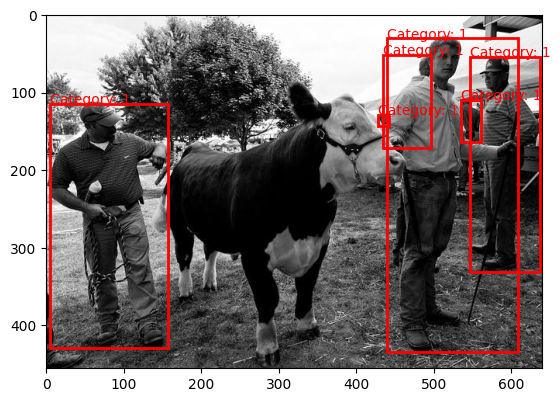

Image: 000000022816.jpg, Bboxes: [[111.68, 47.39, 233.38, 345.05], [310.27, 0, 44.2, 106.07], [402.93, 0.83, 18.63, 62.51], [150.5, 0.69, 144.86, 148.85], [412.15, 0.68, 52.59, 103.92], [349.97, 0, 36.79, 78.16]], Categories: [1, 1, 1, 1, 1, 1]


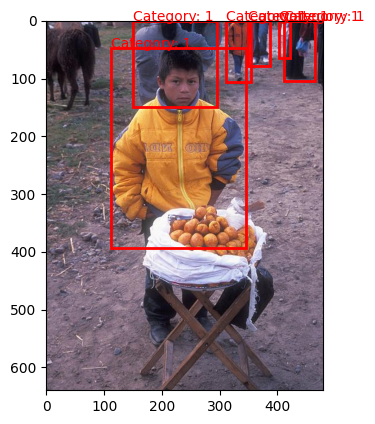

Image: 000000005205.jpg, Bboxes: [[137.17, 106.96, 313.58, 456.63], [398.29, 139.65, 108.46, 317.85]], Categories: [1, 1]


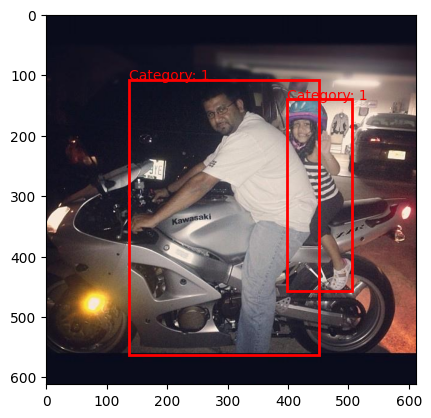

Image: 000000006033.jpg, Bboxes: [[190.86, 86.21, 172.24, 442.07], [350.23, 36.14, 129.77, 214.79]], Categories: [1, 1]


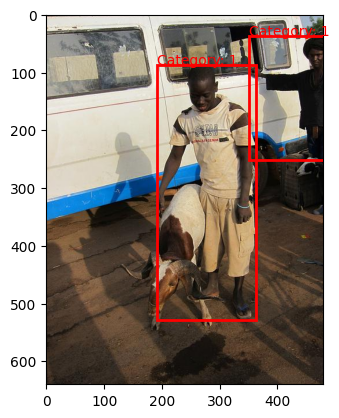

Image: 000000020342.jpg, Bboxes: [[515.68, 150.65, 124.32, 427.69], [31.57, 2.3, 268.34, 289.86]], Categories: [1, 1]


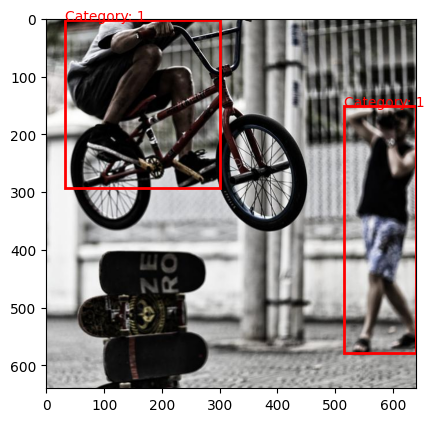

Image: 000000012744.jpg, Bboxes: [[240.89, 199.49, 40.04, 64.45], [235.04, 189.42, 28.87, 125.43], [451.15, 195.63, 69.96, 103.29], [175.54, 236.68, 44.1, 63.91]], Categories: [1, 1, 1, 1]


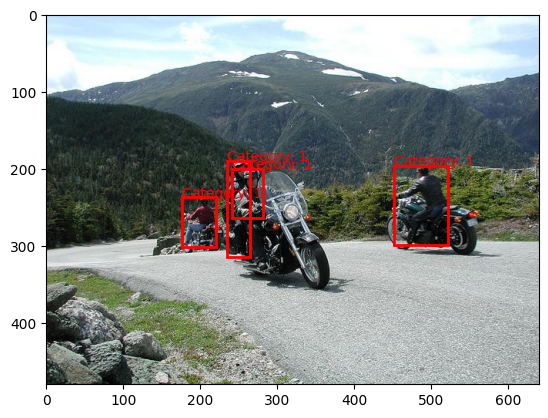

In [30]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Batasi jumlah gambar yang ingin ditampilkan
max_images_to_display = 10

# Loop melalui setiap baris di DataFrame
for index, row in readyTrain.iterrows():
    if index >= max_images_to_display:
        break

    image_filename = row['imageFileName']
    bboxes = eval(row['bboxes'])  # Mengkonversi string JSON ke list Python
    categories = eval(row['categories'])  # Mengkonversi string JSON ke list Python

    # Muat gambar menggunakan PIL
    image_path = os.path.join(trainDir, image_filename)

    try:
        image = Image.open(image_path)
    except Exception as e:
        print(f"Error loading image {image_filename}: {e}")
        continue

    # Contoh: Menampilkan informasi gambar dan anotasi
    print(f"Image: {image_filename}, Bboxes: {bboxes}, Categories: {categories}")

    # Menampilkan gambar dengan anotasi menggunakan matplotlib
    plt.figure()
    plt.imshow(image)

    for bbox, category in zip(bboxes, categories):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(x, y, f'Category: {category}', color='r')

    plt.show()


In [31]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e71228b3e30670d05ccd490ca57e5146c096709f3470515463d4b6e117d3df50
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [32]:
import wget
'''
# URL model pre-trained YOLOv3
yolo_weights_url = "https://pjreddie.com/media/files/yolov3.weights"

# Unduh model pre-trained YOLOv3
'''
yolo_weights_path = annotations
'''
wget.download(yolo_weights_url, yolo_weights_path)
'''

'\nwget.download(yolo_weights_url, yolo_weights_path)\n'

In [33]:
import torch
import torch.nn as nn

# Konfigurasi arsitektur YOLOv3
config = [
    (32, 3, 1),
    (64, 3, 2),
    ["B", 1],
    (128, 3, 2),
    ["B", 2],
    (256, 3, 2),
    ["B", 8],
    (512, 3, 2),
    ["B", 8],
    (1024, 3, 2),
    ["B", 4],
    (512, 1, 1),
    (1024, 3, 1),
    "S",
    (256, 1, 1),
    "U",
    (256, 1, 1),
    (512, 3, 1),
    "S",
    (128, 1, 1),
    "U",
    (128, 1, 1),
    (256, 3, 1),
    "S",
]

In [34]:
class CNNBlock(nn.Module):
  def __init__(self, in_channels, out_channels, bn_act=True, **kwargs):
    super().__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, bias=not bn_act, **kwargs)
    self.use_bn_act = bn_act
    if bn_act:
      self.bn = nn.BatchNorm2d(out_channels)
      self.leaky = nn.LeakyReLU(0.1)

  def forward(self, x):
    if self.use_bn_act:
      return self.leaky(self.bn(self.conv(x)))
    else:
      return self.conv(x)

In [35]:
class ResidualBlock(nn.Module):
  def __init__(self, channels, use_residual=True, num_repeats=1):
    super().__init__()
    self.layers = nn.ModuleList()
    for repeat in range(num_repeats):
      self.layers += [nn.Sequential(
          CNNBlock(channels, channels//2, kernel_size=1),
          CNNBlock(channels//2, channels, kernel_size=3, padding=1)
      )]

      self.use_residual = use_residual
      self.num_repeats = num_repeats

  def forward(self, x):
    for layer in self.layers:
      if self.use_residual:
        x = x + layer(x)
      else:
        x = layer(x)

    return x

In [36]:
class ScalePrediction(nn.Module):
  def __init__(self, in_channels, num_classes):
    super().__init__()
    self.pred = nn.Sequential(
        CNNBlock(in_channels, 2*in_channels, kernel_size=3, padding=1),
        CNNBlock(2*in_channels, (num_classes+5)*3, bn_act=False, kernel_size=1)
    )

    self.num_classes = num_classes

  def forward(self, x):
    # B, C=(3*(num_classes+5)), H, W -> B, 3, num_classes+5, 13, 13 -> B, 3, 13,13, num_classes+5
    return self.pred(x).reshape(x.shape[0], 3, self.num_classes+5, x.shape[2], x.shape[3]).permute(0,1,3,4,2)

In [37]:
class YOLOV3(nn.Module):
  def __init__(self, in_channels=3, num_classes=20):
    super().__init__()
    self.num_classes = num_classes
    self.in_channels = in_channels
    self.layers = self._create_conv_layers()

  def _create_conv_layers(self):
    layers = nn.ModuleList()
    in_channels = self.in_channels

    for module in config:
      if isinstance(module, tuple):
        out_channels, kernel_size, stride = module
        layers.append(CNNBlock(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding = 1 if kernel_size == 3 else 0))
        in_channels = out_channels
      elif isinstance(module, list):
        num_repeats = module[1]
        layers.append(ResidualBlock(in_channels, num_repeats=num_repeats,))
      elif isinstance(module, str):
        if module == "S":
            layers += [
                ResidualBlock(in_channels, use_residual=False, num_repeats=1),
                CNNBlock(in_channels, in_channels // 2, kernel_size=1),
                ScalePrediction(in_channels // 2, num_classes=self.num_classes),
            ]
            in_channels = in_channels // 2

        elif module == "U":
            layers.append(nn.Upsample(scale_factor=2),)
            in_channels = in_channels * 3
    return layers


  def forward(self, x):
    outputs = []  # for each scale
    route_connections = [] # untuk menyimpan residual value yang akan di concat pada saat setelah upsampling
    for layer in self.layers:
        if isinstance(layer, ScalePrediction):
            outputs.append(layer(x))
            continue

        x = layer(x)

        if isinstance(layer, ResidualBlock) and layer.num_repeats == 8:
            route_connections.append(x)

        elif isinstance(layer, nn.Upsample):
            x = torch.cat([x, route_connections[-1]], dim=1)
            route_connections.pop()

    return outputs

In [38]:
# Inisialisasi model YOLOv3
yolo_model = YOLOV3()

# Cetak informasi model
print(yolo_model)

YOLOV3(
  (layers): ModuleList(
    (0): CNNBlock(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky): LeakyReLU(negative_slope=0.1)
    )
    (1): CNNBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky): LeakyReLU(negative_slope=0.1)
    )
    (2): ResidualBlock(
      (layers): ModuleList(
        (0): Sequential(
          (0): CNNBlock(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (leaky): LeakyReLU(negative_slope=0.1)
          )
          (1): CNNBlock(
            (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [39]:
'''
import os
import pandas as pd
import cv2

class YOLOAnnotationGenerator:
    def __init__(self, annotations_folder, image_folder):
        self.annotations_folder = annotations_folder
        self.image_folder = image_folder

    def generate_yolo_annotations_from_dataframe(self, dataframe):
        for _, row in dataframe.iterrows():
            image_filename = row['imageFileName']
            image_path = os.path.join(self.image_folder, image_filename)
            image = cv2.imread(image_path)
            image_height, image_width, _ = image.shape

            bounding_boxes = eval(row['bboxes'])
            categories = eval(row['categories'])

            yolo_annotations = []

            for bbox, category in zip(bounding_boxes, categories):
                x, y, w, h = bbox
                class_id = category

                x_center = (x + w / 2) / image_width
                y_center = (y + h / 2) / image_height
                normalized_width = w / image_width
                normalized_height = h / image_height

                yolo_annotation = f"{class_id} {x_center:.6f} {y_center:.6f} {normalized_width:.6f} {normalized_height:.6f}"
                yolo_annotations.append(yolo_annotation)

            yolo_line = '\n'.join(yolo_annotations)

            annotation_filename = os.path.splitext(image_filename)[0] + '.txt'
            annotation_path = os.path.join(self.annotations_folder, annotation_filename)

            with open(annotation_path, 'w') as f:
                f.write(yolo_line)



generatortrain = YOLOAnnotationGenerator(notetrain , trainDir)
generatorval = YOLOAnnotationGenerator(noteval  , valDir)
generatortrain.generate_yolo_annotations_from_dataframe(readyTrain)
generatorval.generate_yolo_annotations_from_dataframe(readyVal)
'''


'\nimport os\nimport pandas as pd\nimport cv2\n\nclass YOLOAnnotationGenerator:\n    def __init__(self, annotations_folder, image_folder):\n        self.annotations_folder = annotations_folder\n        self.image_folder = image_folder\n\n    def generate_yolo_annotations_from_dataframe(self, dataframe):\n        for _, row in dataframe.iterrows():\n            image_filename = row[\'imageFileName\']\n            image_path = os.path.join(self.image_folder, image_filename)\n            image = cv2.imread(image_path)\n            image_height, image_width, _ = image.shape\n\n            bounding_boxes = eval(row[\'bboxes\'])\n            categories = eval(row[\'categories\'])\n\n            yolo_annotations = []\n\n            for bbox, category in zip(bounding_boxes, categories):\n                x, y, w, h = bbox\n                class_id = category\n\n                x_center = (x + w / 2) / image_width\n                y_center = (y + h / 2) / image_height\n                normalized

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

def collate_fn(batch):
    images, bboxes_list, categories_list = zip(*batch)
    images = torch.stack(images)

    # Find the maximum number of bounding boxes in the batch
    max_num_bboxes = max(len(bboxes) for bboxes in bboxes_list)

    # Pad the bboxes and categories lists to have the same length
    padded_bboxes_list = []
    padded_categories_list = []

    for i in range(len(bboxes_list)):
        bboxes = bboxes_list[i]
        categories = categories_list[i]

        num_padding = max_num_bboxes - len(bboxes)
        padding = torch.zeros(num_padding, 4)
        padded_bboxes = torch.cat((bboxes, padding), dim=0)

        # Pad categories with zeros and set the class to the last index (background class)
        padded_categories = torch.cat((categories, torch.zeros(num_padding, dtype=torch.long)))
        padded_categories[padded_categories == 0] = len(categories) + 1

        padded_bboxes_list.append(padded_bboxes)
        padded_categories_list.append(padded_categories)

    bboxes = torch.stack(padded_bboxes_list)
    categories = torch.stack(padded_categories_list)

    return images, bboxes, categories


class CustomDataset(Dataset):
    def __init__(self, dataframe, annotations_folder, image_dir, transform=None):
        self.dataframe = dataframe
        self.annotations_folder = annotations_folder
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_filename = self.dataframe.loc[idx, 'imageFileName']
        image_path = os.path.join(self.image_dir, image_filename)
        image = Image.open(image_path).convert("RGB")

        annotation_filename = os.path.splitext(image_filename)[0] + '.txt'
        annotation_path = os.path.join(self.annotations_folder, annotation_filename)

        with open(annotation_path, 'r') as f:
            annotations = f.readlines()

        bboxes = []
        categories = []

        for annotation in annotations:
            parts = annotation.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            # Convert the annotation format to match the expected target format
            x_min = x_center - width / 2
            y_min = y_center - height / 2
            x_max = x_center + width / 2
            y_max = y_center + height / 2
            bboxes.append([x_min, y_min, x_max, y_max])
            categories.append(int(class_id))

        if self.transform:
            image = self.transform(image)

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        categories = torch.tensor(categories, dtype=torch.long)
        return image, bboxes, categories



# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(readyTrain, notetrain, trainDir, transform=transform)
val_dataset = CustomDataset(readyVal, noteval, valDir, transform=transform)

batch_size = 8

# Create DataLoader for CustomDataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)




In [41]:
import torch
import torch.nn as nn

class YoloLoss(nn.Module):
    def __init__(self, lambda_coord=5, lambda_noobj=0.5):
        super().__init__()
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj
        self.mse = nn.MSELoss(reduction='sum')
        self.bce = nn.BCEWithLogitsLoss(reduction='sum')
        self.sigmoid = nn.Sigmoid()
        self.entropy = nn.CrossEntropyLoss()




    def forward(self, predictions, target, anchors, obj_mask, noobj_mask):
        obj_indices = torch.where(obj_mask)[0].tolist()
        noobj_indices = torch.where(noobj_mask)[0].tolist()

        obj_indices = torch.tensor(obj_indices)  # Convert list to tensor
        noobj_indices = torch.tensor(noobj_indices)  # Convert list to tensor

        obj_loss = self.bce(predictions[obj_indices, 0], target[obj_indices, 0])
        noobj_loss = self.bce(predictions[noobj_indices, 0], target[noobj_indices, 0])
        objectness_loss = self.lambda_noobj * noobj_loss + obj_loss

        box_preds = torch.cat([self.sigmoid(predictions[obj_indices, 1:3]), torch.exp(predictions[obj_indices, 3:5]) * anchors], dim=-1)
        box_loss = self.mse(box_preds, target[obj_indices, 1:5])
        box_loss = self.lambda_coord * box_loss

        class_loss = self.entropy(predictions[obj_indices, 5:], target[obj_indices, 5].long())

        total_loss = objectness_loss + box_loss + class_loss
        return total_loss


In [42]:
# Define the anchors
anchors = [
    [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],  # Large anchors
    [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],  # Medium anchors
    [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],  # Small anchors
]

def train_model(model, train_loader, val_loader, num_epochs, learning_rate, anchors):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = YoloLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for batch_idx, (images, bboxes_list, categories_list) in enumerate(train_loader):
            images = images.to(device)

            optimizer.zero_grad()

            outputs = model(images)

            # Create a list to store all bounding boxes and categories in this batch
            all_bboxes = []
            all_categories = []

            for bboxes, categories in zip(bboxes_list, categories_list):
                all_bboxes.extend(bboxes)
                all_categories.extend(categories)

            # Convert the list to tensors
            target_bboxes = torch.stack(all_bboxes, dim=0).to(device)
            target_categories = torch.tensor(all_categories, dtype=torch.long).to(device)

            # Calculate objectness mask and noobject mask
            obj_mask = target_bboxes[:, 0] == 1
            noobj_mask = target_bboxes[:, 0] == 0

            # Combine target information into one tensor
            target = torch.cat([target_bboxes[:, 1:], target_categories.unsqueeze(1).float()], dim=1)

            # Calculate loss
            loss = criterion(outputs, target, anchors, obj_mask, noobj_mask)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}")


        # Validation
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch_idx, (images, bboxes_tuple, categories_tuple) in enumerate(val_loader):
                images = images.to(device)
                bboxes = bboxes_tuple[0].to(device)  # Remove [0]
                categories = categories_tuple[0].to(device)  # Remove [0]

                outputs = model(images)

                # Convert bboxes and categories into target format expected by the model
                target = []
                for bbox, category in zip(bboxes, categories):
                    target.append(torch.cat([bbox.unsqueeze(0), torch.tensor([category]).unsqueeze(0)], dim=1))
                target = torch.stack(target, dim=0)

                loss = criterion(outputs, target, anchors)  # Using anchors parameter

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Validation Loss: {avg_val_loss:.4f}")

    print("Training finished!")




In [42]:
# Train the model
train_model(yolo_model, train_loader, val_loader, num_epochs=50, learning_rate=0.001, anchors=anchors)